# Data Science in Python


Name: Karthikeyan Jawahar

# Introduction

The Movie Database (TMDb) is a community built movie and TV database. Every piece of data has been added by their amazing community. TMDb's strong international focus and breadth of data is largely unmatched and something they are incredibly proud of. Put simply, they live and breathe community and that's precisely what makes them different.

# Objective

The aim of this notebook is to analyse the movies data with many various graphs and interpretation of these data.

# Python Library

Pandas, Numpy, Seaborn, Matplotlib

In [15]:
import pandas as pd
import numpy as np
import requests
import io
import csv
import json
import datetime
import os.path
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# pd.options.mode.chained_assignment = None  # default='warn' to avoid default warning for Setting with Copy

# Step 1: To Identify one or more suitable web APIs


API Chosen:

The APIs chosen for this assignment was provided by https://www.themoviedb.org/

Mainly, https://developers.themoviedb.org/3/discover/movie-discover used to get the Movie details for the given year(2018), https://developers.themoviedb.org/3/genres/get-movie-list used to get the genre category details.

The API is allowed to use upon registration. Only 40 requests can be made for 10 seconds.

The API key received which works here is *******************

API key registered to fetch the movie database

In [17]:
api_key = "** Your API Key **"

To check if the file is existing already to avoid appending headers multiple time

In [18]:
file_exist=os.path.isfile("Movie_data.csv")

Function to fetch the master genre categories available in TMDb. This is stored in the dictionary for later use

# Step 2: To collect the raw Movie data using API

In [23]:
# To get the genre data(API)
def get_genre_data():
    genre_api_key = "******"
    genre_link = "https://api.themoviedb.org/3/genre/movie/list?api_key="+genre_api_key+"&language=en-US"
    
    genre_response = requests.get(genre_link)
    genre_data = genre_response.json()
    
    genre_list = genre_data["genres"]
    genre_dict ={}
    
# To allocate the different genre categories for respective genre ids
    for i in range(0,len(genre_list)):
        key = genre_list[i]["id"]
        value = genre_list[i]["name"]
        genre_dict[key] = value
        
# Returns genre dictionary with genre and its ids
    return genre_dict


In [24]:
# Genre data API fetch call
genre_final_data = get_genre_data()

Function to request movie data from TMDb using API call (Discover API)

In [25]:
# Function to request movie data
def request_movie_data(link):
# First page (in the database) response
    response = requests.get(link)
    raw_data = response.json() 
    
# Returns the results of raw movie data    
    return raw_data


Function to write raw movie data as csv

In [26]:
# Function to write the raw movie data as csv
def write_rawmovie_data(file_name,content,heading):
    with open(file_name, "a", encoding="utf-8", newline='') as csvfile: #to avoid newline space b/w rows
        writer = csv.DictWriter(csvfile,heading) #Dictwriter to avoid read only mode in csv
        if not file_exist:  #To avoid appending of headers multiple times
            writer.writeheader()
        writer.writerows(content)
    


Function to replace all Genre ids in the raw data into respective Genres and Null(NaN) values for better analysis

In [27]:
# To replace the genre ids with genre names
def replace_genre_ids(raw_data):
    for item in range(0,len(raw_data["results"])):
        ids = []
        ids = raw_data["results"][item]["genre_ids"]
        genre_name = ''
        if len(ids) > 0:
            for i in ids:
                if i in genre_final_data.keys():
                    if len(genre_name) > 0:
                        genre_name = genre_name+','+(genre_final_data[i])
                    else:
                        genre_name = genre_final_data[i]
                else:
                    genre_name = 'NaN' #if no genre present, replaced with NaN
        else:
            genre_name = 'NaN'
        raw_data["results"][item]["genre"] = genre_name #replaced genre ids with genre names
        
#returns the updated raw data with new column 'genre'  
    return raw_data

First API call to fetch the movie details for the year 2018.

Note: A single API request can return only 20 records in a json format. The entire data is split into many pages wheee each page gives 20 records. One request returns data of a single page. Thus we need to send recursive requests to fetch the whole data.

In [28]:
# First API request
link_initial = "https://api.themoviedb.org/3/discover/movie?api_key="+api_key+"&language=en-US&sort_by=popularity.desc&include_adult=false&include_video=false&primary_release_year=2018"
raw_data_initial = request_movie_data(link_initial)

# Store total page count
page = raw_data_initial["total_pages"]


To write the updated movie data for the first request(first page data) with the new genre column into the csv

In [29]:
updated_movie_data_initial = replace_genre_ids(raw_data_initial)

# To fetch the keys from the results for all the headers
heading = updated_movie_data_initial["results"][0].keys()

#To write the updated movie data into csv
write_rawmovie_data("Movie_data.csv",updated_movie_data_initial["results"],heading)
file_exist=os.path.isfile("Movie_data.csv") #To change the file_exist condition to true

# Step 3: To collect remaining data, parse and store it in csv format

Recursive loop to call the API multiple times for each page to fetch the complete data

In [30]:
# Takes around 8-9 minutes for the entire data to get stored
for i in range(2,page+1):  #i - the page number(2,3,4,...)
    link_remaining = "https://api.themoviedb.org/3/discover/movie?api_key="+api_key+"&language=en-US&sort_by=popularity.desc&include_adult=false&include_video=false&page="+str(i)+"&primary_release_year=2018"
    raw_data_remaining = request_movie_data(link_remaining)
    
#To get the updated movie data with new column genre
    updated_movie_data_remaining = replace_genre_ids(raw_data_remaining)
    
#Write the updated data into the movie csv
    write_rawmovie_data("Movie_data.csv",updated_movie_data_remaining["results"],heading)


# Step 4: Represent the data into appropriate data structure form to process, filter, clean, modify the data

Create a data frame from the raw movie data csv

In [31]:
df = pd.read_csv("Movie_data.csv")

#To get the rows and column details of the data frame
df.shape

#display dataframe
df

,vote_count,id,video,vote_average,title,popularity,poster_path,original_language,original_title,genre_ids,backdrop_path,adult,overview,release_date,genre
0,1525,424783,False,6.5,Bumblebee,359.316,/fw02ONlDhrYjTSZV8XO6hhU3ds3.jpg,en,Bumblebee,"[28, 12, 878]",/wtZj5nn6hVwgakPdg6y6gm3eFXU.jpg,False,"On the run in the year 1987, Bumblebee finds r...",2018-12-15,"Action,Adventure,Science Fiction"
1,957,504172,False,6.5,The Mule,237.369,/oeZh7yEz3PMnZLgBPhrafFHRbVz.jpg,en,The Mule,"[80, 18, 53]",/bTeRgkAavyw1eCtSkaww18wLYNP.jpg,False,"Earl Stone, a man in his 80s who is broke, alo...",2018-12-14,"Crime,Drama,Thriller"
2,2843,324857,False,8.5,Spider-Man: Into the Spider-Verse,176.013,/iiZZdoQBEYBv6id8su7ImL0oCbD.jpg,en,Spider-Man: Into the Spider-Verse,"[28, 12, 16, 878, 35]",/uUiId6cG32JSRI6RyBQSvQtLjz2.jpg,False,Miles Morales is juggling his life between bei...,2018-12-07,"Action,Adventure,Animation,Science Fiction,Comedy"
3,4817,297802,False,6.8,Aquaman,173.562,/5Kg76ldv7VxeX9YlcQXiowHgdX6.jpg,en,Aquaman,"[28, 12, 14, 878]",/9QusGjxcYvfPD1THg6oW3RLeNn7.jpg,False,Once home to the most advanced civilization on...,2018-12-07,"Action,Adventure,Fantasy,Science Fiction"
4,89,450001,False,5.2,Master Z: Ip Man Legacy,170.596,/2WfjB6FUDTIBVI2y02UGbnHR82s.jpg,cn,葉問外傳：張天志,[28],/grtVFGJ4ts0nDAPpc1JWbBoVKTu.jpg,False,"After being defeated by Ip Man, Cheung Tin Chi...",2018-12-20,Action
5,4064,338952,False,6.9,Fantastic Beasts: The Crimes of Grindelwald,140.033,/fMMrl8fD9gRCFJvsx0SuFwkEOop.jpg,en,Fantastic Beasts: The Crimes of Grindelwald,"[10751, 14, 12]",/wDN3FIcQQ1HI7mz1OOKYHSQtaiE.jpg,False,Gellert Grindelwald has escaped imprisonment a...,2018-11-14,"Family,Fantasy,Adventure"
6,12250,299536,False,8.3,Avengers: Infinity War,134.293,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,en,Avengers: Infinity War,"[12, 28, 14]",/bOGkgRGdhrBYJSLpXaxhXVstddV.jpg,False,As the Avengers and their allies have continue...,2018-04-25,"Adventure,Action,Fantasy"
7,1240,428078,False,5.9,Mortal Engines,120.173,/uXJVpPXxZO4L8Rz3IG1Y8XvZJcg.jpg,en,Mortal Engines,"[878, 28, 12, 14, 53]",/jnOuttTfG9KKpmOZtprC4pA1AlZ.jpg,False,"Many thousands of years in the future, Earth’s...",2018-11-27,"Science Fiction,Action,Adventure,Fantasy,Thriller"
8,1079,400650,False,6.7,Mary Poppins Returns,116.682,/uTVGku4LibMGyKgQvjBtv3OYfAX.jpg,en,Mary Poppins Returns,"[14, 10751, 35]",/cwiJQXezWz876K3jS57Sq56RYCZ.jpg,False,"In Depression-era London, a now-grown Jane and...",2018-12-13,"Fantasy,Family,Comedy"
9,6428,424694,False,8.1,Bohemian Rhapsody,105.743,/lHu1wtNaczFPGFDTrjCSzeLPTKN.jpg,en,Bohemian Rhapsody,"[18, 10402]",/xcaSYLBhmDzJ6P14bcKe0KTh3QV.jpg,False,"Singer Freddie Mercury, guitarist Brian May, d...",2018-10-24,"Drama,Music"


Here are the data we want to keep:

vote_count                  
vote_average    
title          
popularity      
release_date    
genre           

Hence the other columns are dropped from the data frame


In [32]:
# Drop the columns in data frame
df.drop(["id","video","poster_path","original_language","original_title","genre_ids","backdrop_path","adult","overview"],inplace=True,axis=1)


In [33]:
#Check for missing values in the data frame
df.isnull().sum()

vote_count         0
vote_average       0
title              0
popularity         0
release_date       0
genre           3933
dtype: int64

Missing values : The genre column in the data frame contains the NaN values, the below code removes the Missing values

In [34]:
df.dropna(axis=0,how='any',inplace=True) #drop NaN values

In [35]:
df.isnull().sum() #check for missing values

vote_count      0
vote_average    0
title           0
popularity      0
release_date    0
genre           0
dtype: int64

In [36]:
df # to check for zero values in the dataframe

,vote_count,vote_average,title,popularity,release_date,genre
0,1525,6.5,Bumblebee,359.316,2018-12-15,"Action,Adventure,Science Fiction"
1,957,6.5,The Mule,237.369,2018-12-14,"Crime,Drama,Thriller"
2,2843,8.5,Spider-Man: Into the Spider-Verse,176.013,2018-12-07,"Action,Adventure,Animation,Science Fiction,Comedy"
3,4817,6.8,Aquaman,173.562,2018-12-07,"Action,Adventure,Fantasy,Science Fiction"
4,89,5.2,Master Z: Ip Man Legacy,170.596,2018-12-20,Action
5,4064,6.9,Fantastic Beasts: The Crimes of Grindelwald,140.033,2018-11-14,"Family,Fantasy,Adventure"
6,12250,8.3,Avengers: Infinity War,134.293,2018-04-25,"Adventure,Action,Fantasy"
7,1240,5.9,Mortal Engines,120.173,2018-11-27,"Science Fiction,Action,Adventure,Fantasy,Thriller"
8,1079,6.7,Mary Poppins Returns,116.682,2018-12-13,"Fantasy,Family,Comedy"
9,6428,8.1,Bohemian Rhapsody,105.743,2018-10-24,"Drama,Music"


There are '0' values still present in the dataframe under the vote_average column, to remove the values with '0' the below code is performed. This value is not used for analysis.

In [37]:
df=df[(df!=0).all(1)] # to remove the rows with '0' as a value
df # 0 values removed dataframe

,vote_count,vote_average,title,popularity,release_date,genre
0,1525,6.5,Bumblebee,359.316,2018-12-15,"Action,Adventure,Science Fiction"
1,957,6.5,The Mule,237.369,2018-12-14,"Crime,Drama,Thriller"
2,2843,8.5,Spider-Man: Into the Spider-Verse,176.013,2018-12-07,"Action,Adventure,Animation,Science Fiction,Comedy"
3,4817,6.8,Aquaman,173.562,2018-12-07,"Action,Adventure,Fantasy,Science Fiction"
4,89,5.2,Master Z: Ip Man Legacy,170.596,2018-12-20,Action
5,4064,6.9,Fantastic Beasts: The Crimes of Grindelwald,140.033,2018-11-14,"Family,Fantasy,Adventure"
6,12250,8.3,Avengers: Infinity War,134.293,2018-04-25,"Adventure,Action,Fantasy"
7,1240,5.9,Mortal Engines,120.173,2018-11-27,"Science Fiction,Action,Adventure,Fantasy,Thriller"
8,1079,6.7,Mary Poppins Returns,116.682,2018-12-13,"Fantasy,Family,Comedy"
9,6428,8.1,Bohemian Rhapsody,105.743,2018-10-24,"Drama,Music"


To convert the data types of the columns( title, genre, release_date) to appropriate data types

In [38]:
df.title = df.title.astype('category')
df.genre = df.genre.astype('category')
df['release_date'] = pd.to_datetime(df['release_date'])

In [39]:
df.info() # to show the data types of each column
df.describe() #summary of data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7894 entries, 0 to 14564
Data columns (total 6 columns):
vote_count      7894 non-null int64
vote_average    7894 non-null float64
title           7894 non-null category
popularity      7894 non-null float64
release_date    7894 non-null datetime64[ns]
genre           7894 non-null category
dtypes: category(2), datetime64[ns](1), float64(2), int64(1)
memory usage: 581.8 KB


,vote_count,vote_average,popularity
count,7894.000000,7894.000000,7894.000000
mean,83.995693,6.408703,4.900852
std,491.731281,1.757154,11.589596
min,1.000000,0.500000,0.600000
25%,1.000000,5.400000,1.752000
50%,3.000000,6.400000,2.546000
75%,15.000000,7.500000,4.266250
max,12250.000000,10.000000,359.316000


Thus there are no null values, missing values, string type values in the data frame. 

# Step 5: Analyse and summarise the clean data set 

Sub data frame created for plotting the popular movies of 2018 based on its popularity score

In [40]:
popularity_df = df[['title','popularity']]
popularity_df.set_index('title',inplace=True) # index is set as title

In [41]:
Top_10 = popularity_df.head(10) #to fetch the top 10 popular movies
Top_10 # display top 10 popular movies

,popularity
title,
Bumblebee,359.316
The Mule,237.369
Spider-Man: Into the Spider-Verse,176.013
Aquaman,173.562
Master Z: Ip Man Legacy,170.596
Fantastic Beasts: The Crimes of Grindelwald,140.033
Avengers: Infinity War,134.293
Mortal Engines,120.173
Mary Poppins Returns,116.682


In [42]:
Top_10.describe() #summarise the top 10 movie details

,popularity
count,10.000000
mean,173.378000
std,75.969096
min,105.743000
25%,123.703000
50%,155.314500
75%,175.400250
max,359.316000


## Matplotlib and Pandas Graph

Bar graph representing Top 10 Popular movies in 2018

Text(0.5, 1.0, 'Top 10 Popular Movies - 2018')

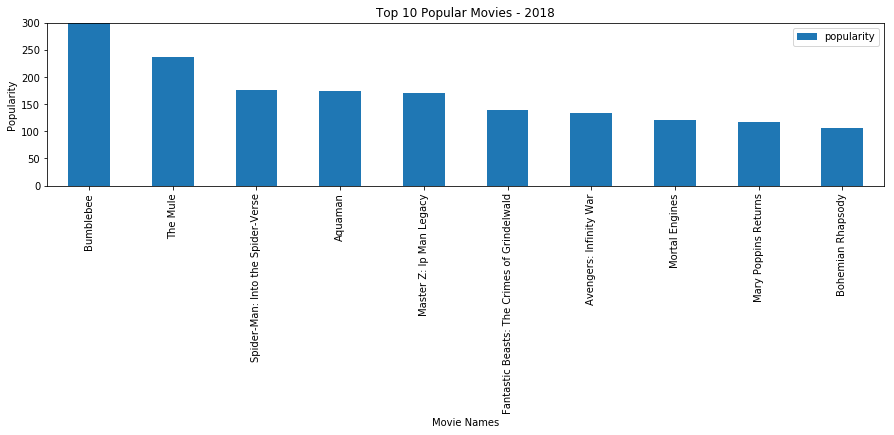

In [43]:
p=Top_10.plot.bar(figsize=(15,3))
# customize the axes and title
p.set_ylim((0,300))
p.set_xlabel("Movie Names")
p.set_ylabel("Popularity")
p.set_title("Top 10 Popular Movies - 2018")

To find the count of movies in each genres and which genre movies were more popular

In [44]:
Genre_Arr = []
Genre_Arr = list(genre_final_data.values())
genre_count =[]
genre_data_frames = {}

for genre in Genre_Arr:
    genre_data_frames[genre] = df.loc[(df["genre"] == genre) | (df["genre"].str.contains(genre))] #data processing to obtain genre wise data frame which is stored in a dictionary
    genre_count.append(len(genre_data_frames[genre].index))


Pie chart representing the movie counts for each genre

In [45]:
# Creating panda series(genre, count) to represent pie graph
genre_wise_count = pd.Series(genre_count,index=Genre_Arr,name='Genre')
genre_wise_count #display the genre count series

Action              885
Adventure           380
Animation           375
Comedy             2179
Crime               532
Documentary        1059
Drama              3078
Family              442
Fantasy             384
History             223
Horror              929
Music               259
Mystery             400
Romance             886
Science Fiction     402
TV Movie            414
Thriller           1307
War                 105
Western              50
Name: Genre, dtype: int64

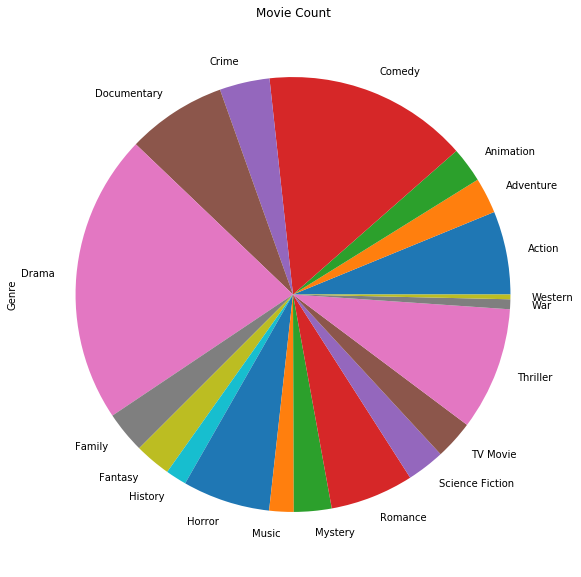

In [46]:
pie_chart = genre_wise_count.plot(kind="pie", figsize=(10, 10),title='Movie Count') #plotting the pie graph

In [47]:
genre_count_top=genre_wise_count.sort_values(ascending=False) #sorting the genres based on count in descending order
genre_count_top#display the genre count 

Drama              3078
Comedy             2179
Thriller           1307
Documentary        1059
Horror              929
Romance             886
Action              885
Crime               532
Family              442
TV Movie            414
Science Fiction     402
Mystery             400
Fantasy             384
Adventure           380
Animation           375
Music               259
History             223
War                 105
Western              50
Name: Genre, dtype: int64

Pie graph representing top 6 movie genres with high movie count

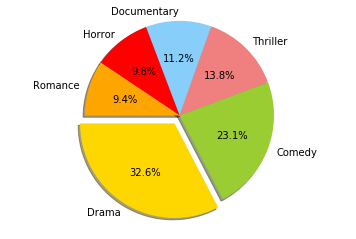

In [48]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red','orange']
explode = []
top_genres = []
for i in range(0,len(genre_count_top.head(6))): #to get top 6 values and stored in list
        top_genres.append(genre_count_top[i])
        if i == 0:
            explode.append(0.1)  # explode 1st slice
        else:
            explode.append(0)
            
# Plot the pie graph
plt.pie(genre_count_top.head(6), explode=explode, labels=genre_count_top.head(6).index, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180) 
plt.axis('equal')
plt.show()

# Dump months Movie Season Analysis

In [49]:
date_df = df.set_index('release_date') #set release date as the data frame index

In movie industry, there is a term Dump months in which they do not release much movies. To analyse that concept and the movie seasons the graph is plotted. Various subsets of data frame is created.

Dump months: January, February, August, September

In [50]:
Dump_month_1 = date_df.loc[date_df.index.month < 3]
type(date_df.index.month)
Dump_month_2 = date_df.loc[(date_df.index.month ==8) | (date_df.index.month ==9)]
Other_season = date_df.loc[(date_df.index.month >=3) & ((date_df.index.month <8) | (date_df.index.month > 9))]

To calculate the genre counts in each season

In [51]:
Dump1_count =[]
Dump2_count=[]
OtherSeason_count=[]
Dump1_data_frames = {}
Dump2_data_frames = {}
OtherSeason_data_frames = {}

for genre in Genre_Arr:
    Dump1_data_frames[genre] = Dump_month_1.loc[(Dump_month_1["genre"] == genre) | (Dump_month_1["genre"].str.contains(genre))]
    Dump2_data_frames[genre] = Dump_month_2.loc[(Dump_month_2["genre"] == genre) | (Dump_month_2["genre"].str.contains(genre))]
    OtherSeason_data_frames[genre] = Other_season.loc[(Other_season["genre"] == genre) | (Other_season["genre"].str.contains(genre))]

    Dump1_count.append(len(Dump1_data_frames[genre].index)) #genre wise count for dump season 1
    Dump2_count.append(len(Dump2_data_frames[genre].index)) #genre wise count for dump season 2
    OtherSeason_count.append(len(OtherSeason_data_frames[genre].index)) #genre wise count for other movie seasons
    
    
    
    

In [52]:
Dump1_df = pd.Series(Dump1_count,index=Genre_Arr,name='Genre').sort_values(ascending=False)
Dump2_df = pd.Series(Dump2_count,index=Genre_Arr,name='Genre').sort_values(ascending=False)
Other_season_df = pd.Series(OtherSeason_count,index=Genre_Arr,name='Genre').sort_values(ascending=False)

genres_top = ["Action", "Comedy", "Romance", "Drama"]

Seasonal_data = {'Seasons': ['JAN-FEB', 'AUG-SEP', 'OTHER']}

for gen in genres_top:
    Seasonal_data[gen] = []
    Seasonal_data[gen].append(Dump1_df[gen])
    Seasonal_data[gen].append(Dump2_df[gen])
    Seasonal_data[gen].append(Other_season_df[gen])

Seasonal_DF = pd.DataFrame(Seasonal_data, columns = ['Seasons', 'Action', 'Comedy', 'Romance','Drama'])
Seasonal_DF = Seasonal_DF.set_index("Seasons")
Seasonal_DF #subset data frame for the season wise movie analysis


,Action,Comedy,Romance,Drama
Seasons,,,,
JAN-FEB,161,408,167,526
AUG-SEP,172,369,149,614
OTHER,552,1402,570,1938


Stacked bar graph for Season wise number of movies released

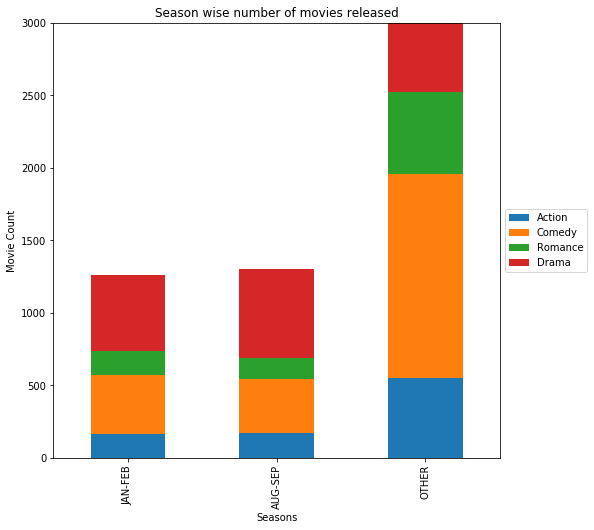

In [53]:
p = Seasonal_DF.plot.bar(stacked=True,figsize=(8, 8))
# customize the axes and title
p.set_ylim((0,3000))
p.set_xlabel("Seasons")
p.set_ylabel("Movie Count")
p.set_title("Season wise number of movies released")
# move the legend to outside the plot
p.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


From the above graph it is inferred that the number of movies released in each genre is significantly less during dump months when compared to other movie seasons.

Scatter plot graph to find the correlation between the voting average(rating) and popularity score for the movies

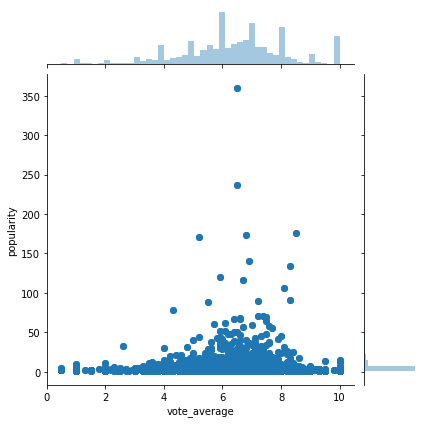

In [54]:
#plotting scatter correlation graph
scatter = sns.jointplot(data=df, x='vote_average', y='popularity')

From the above graph, it is inferred that voting average is more dense for movies with average popular rating

Histogram to plot distribution of average rating given by users to movies based on genre

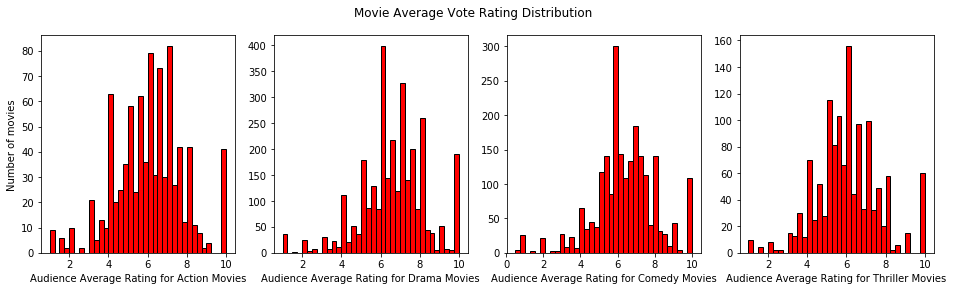

In [55]:
fig, ax = plt.subplots(1,4)
fig.set_size_inches(16, 4)

#plotting histograms
ax[0].hist(genre_data_frames["Action"]["vote_average"],color='red',edgecolor='black',bins=int(180/5))
ax[1].hist(genre_data_frames["Drama"]["vote_average"],color='red',edgecolor='black',bins=int(180/5))
ax[2].hist(genre_data_frames["Comedy"]["vote_average"],color='red',edgecolor='black',bins=int(180/5))
ax[3].hist(genre_data_frames["Thriller"]["vote_average"],color='red',edgecolor='black',bins=int(180/5))

#label the graphs
ax[0].set(xlabel='Audience Average Rating for Action Movies', ylabel='Number of movies')
ax[1].set(xlabel='Audience Average Rating for Drama Movies')
ax[2].set(xlabel='Audience Average Rating for Comedy Movies')
ax[3].set(xlabel='Audience Average Rating for Thriller Movies')

plt.suptitle('Movie Average Vote Rating Distribution')


plt.show()




From the histogram it is inferred that people give high votes to "action" movies (from first graph)

Genre     Average Rating(approx.)
Action    7
Drama     6
Comedy    5.8
Thriller  6.2

# Conclusion

In the future more analysis can be done to predict in which season what genre movies can be released to increase the gross collection. 